# Grip At The Sparks Foundation Intenship

# Author : Aalliya Pathan

# TASK-1

# Prediction using Supervised ML
                (Level - Beginner)

## Linear Regression with Python Scikit Learn

# Simple Linear Regression

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

## Importing all libraries required in this notebook

In [40]:
import pandas as pd         #for fast analysis, data cleaning & preparation
import numpy as np          #linear algebra library for python
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Importing dataset

In [41]:
# Reading data from csv(comma seperated values) file.
# data can also be read from an url, excel, html, sql files. 
# url = "http://bit.ly/w-data"
df = pd.read_csv('data.csv')        
print("Data imported successfully")

df
#df.head(10)     this will display the first 10 rows of the data.

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [42]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [43]:
#return hown many rows, columns& dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


#### Here we use describe() method so that we can able to see percentiles,mean,std,max,count of the given dataset.

In [44]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [45]:
#Let's print the full summary of the dataframe .
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


### If you want to build models with your data, null values are (almost) never allowed. It is important to always see how many samples have missing values and for which columns.

In [46]:
#checking null value
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [47]:
df.shape

(25, 2)

# Data Visualization

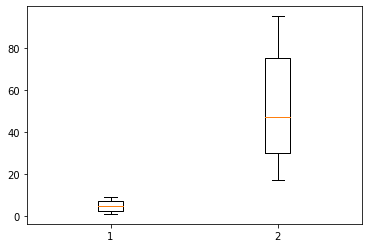

In [48]:
plt.boxplot(df)
plt.show()

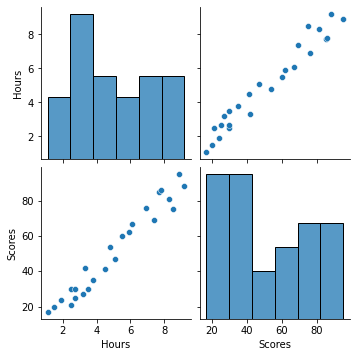

In [51]:
sns.pairplot(df)

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

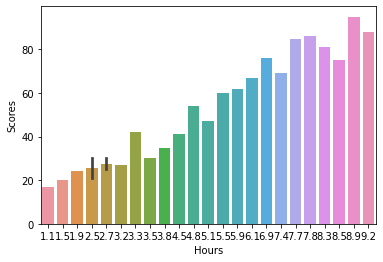

In [52]:
sns.barplot(x = "Hours", y = "Scores", data = df)

### Now, Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

Text(0, 0.5, 'Percentage Score')

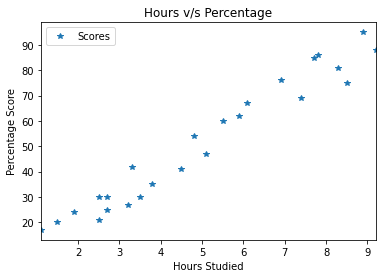

In [49]:
# Plotting the distribution of scores
df.plot(x ='Hours', y='Scores', style='*')  
plt.title('Hours v/s Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
#plt.show()


**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

Graphs indicates positive linear relationship as much as hours You study is a chance of high scoring

# Preparing the data
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [53]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

Every algorithm exposed in Scikit-learn via an "Estimator"
The main API implemented by Scikit-learn is that of Estimator. An estimator is any object that learns from data.
Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [54]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

# Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [55]:
from sklearn.linear_model import LinearRegression  
lm = LinearRegression()          # creating LR object to instantiate it
lm.fit(X_train, y_train)
lm.coef_

print("Training complete.")

Training complete.


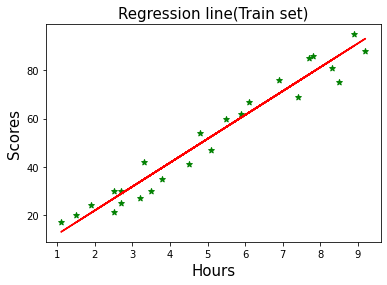

In [56]:
# Plotting the regression line
line = lm.coef_*X+lm.intercept_

# Plotting for the test data
plt.scatter(X, y, color="green", marker="*")
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Train set)",fontsize=15)
plt.plot(X, line, color= "red");
plt.show()

# Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [57]:
print(X_test) # Testing data - In Hours
y_pred = lm.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [58]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

# Comparing Actual vs Predicted

Text(0.5, 1.0, 'Regression line(Test set)')

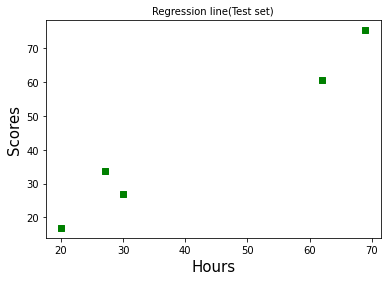

In [59]:

plt.scatter(y_test, y_pred,color='green',marker='s')

plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Test set)",fontsize=10)

In [60]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## You can also test with your own data
What will be predicted score if a student studies for 9.25 hrs/ day? 

In [61]:
hours = 9.25
own_pred = lm.predict([[hours]])

print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737535


# Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [62]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', 
      metrics.mean_squared_error(y_test,y_pred)) 



Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406


### Completed Task 1